# Auto

Load dependent libraries

In [36]:
suppressMessages(library(dplyr))
suppressMessages(library(reshape))
suppressMessages(library(ggplot2))

Load Auto dataset from `Auto.csv` file into `df` dataframe

In [37]:
df <- read.csv("Auto.csv", header = TRUE)
suppressMessages(attach(df))

## Exploratory data analysis

### Dataset info

In [3]:
str(df)

'data.frame':	392 obs. of  9 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  307 350 318 304 302 429 454 440 455 390 ...
 $ horsepower  : int  130 165 150 150 140 198 220 215 225 190 ...
 $ weight      : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ name        : Factor w/ 301 levels "amc ambassador brougham",..: 49 36 230 14 160 141 54 222 240 2 ...


The `Auto` dataset contains *392 observations* of *9 variables*. 
- `mpg` is the label variable we intend to predict
- 8 feature variables are available
    - **6 quantitative features** including number of `cylinders`, `displacement`, `horsepower`...
    - **2 qualitative feature** describing the Automobile `name` and `origin`

In [4]:
# removing factors from name column
df$name <- as.character(df$name)

# set origin as factors
df$origin <- factor(df$origin)

In [5]:
summary(df)

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year       origin      name          
 Min.   : 8.00   Min.   :70.00   1:245   Length:392        
 1st Qu.:13.78   1st Qu.:73.00   2: 68   Class :character  
 Median :15.50   Median :76.00   3: 79   Mode  :character  
 Mean   :15.54   Mean   :75.98                             
 3rd Qu.:17.02   3rd Qu.:79.00                             
 Max.   :24.80   Max.   :82.00                             

### Check for missing values and typos

In [6]:
# check for NA values in the dataframe
any(is.na(df))

[1] FALSE

In [7]:
head(df)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [8]:
tail(df)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
387,27,4,151,90,2950,17.3,82,1,chevrolet camaro
388,27,4,140,86,2790,15.6,82,1,ford mustang gl
389,44,4,97,52,2130,24.6,82,2,vw pickup
390,32,4,135,84,2295,11.6,82,1,dodge rampage
391,28,4,120,79,2625,18.6,82,1,ford ranger
392,31,4,119,82,2720,19.4,82,1,chevy s-10


Exploring the sturcture of the dataset and the data suggets that there's no inconsistent values in the dataset

### Check for outliers in the dataset

In [9]:
melt.df <- melt(df[,1:length(df)-1])
head(melt.df,3)

Using origin as id variables


origin,variable,value
1,mpg,18
1,mpg,15
1,mpg,18


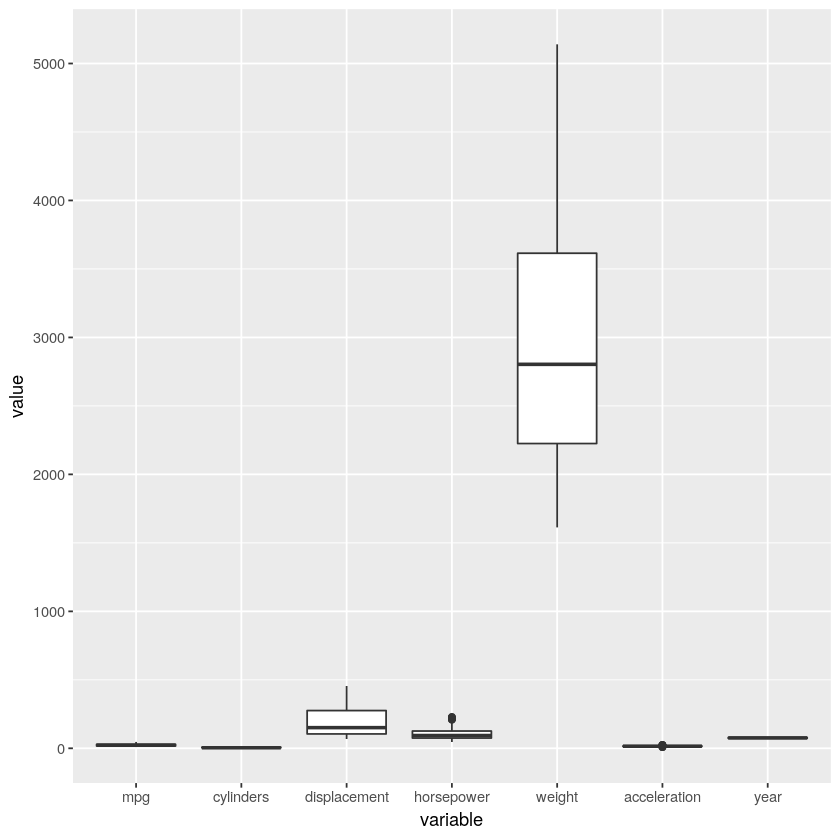

In [10]:
p <- ggplot(melt.df, aes(variable, value)) 
p + geom_boxplot() 

We can observe the following from the above boxplot
* `weight` variable is out of scale, compared to other variables
* `horsepower` and `acceleration` contains outliers

In [11]:
# applying transformation on weight variable
df$weight <- log(df$weight)

Using origin as id variables


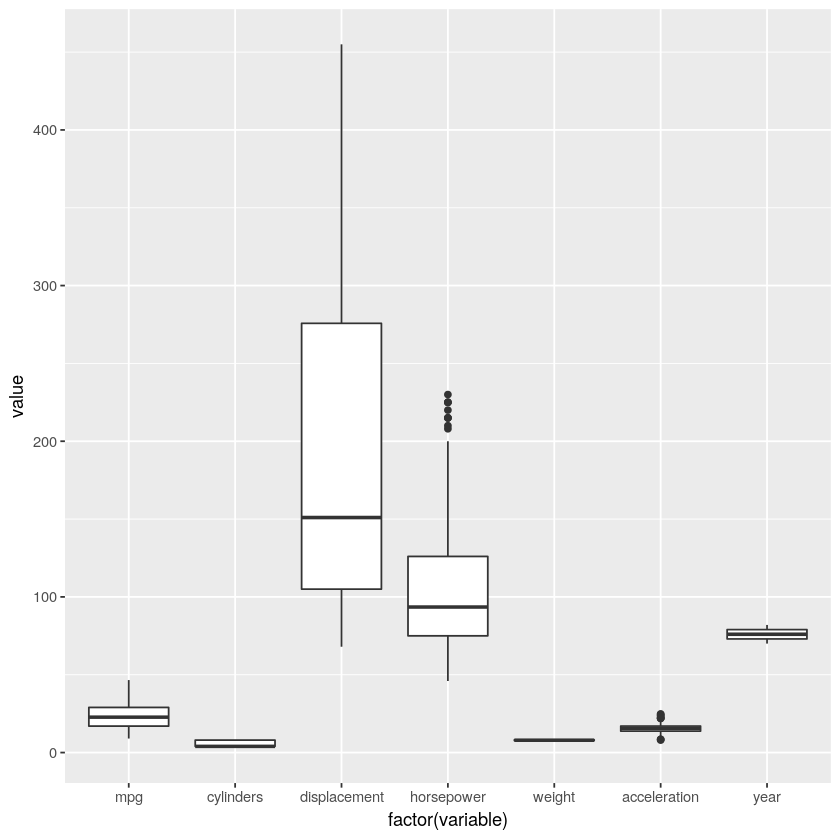

In [12]:
# melt dataframe
melt.df2 <- melt(df[,1:length(df)-1])

# boxplot on the new data with log(weight)
p <- ggplot(melt.df2, aes(factor(variable), value)) 
p + geom_boxplot() 

Applying transformations on `displacement` and `horsepower` and `year` variable

In [13]:
df$displacement <- sqrt(displacement)
df$horsepower <- sqrt(horsepower)
df$year <- sqrt(year)
# df$mpg <- log(mpg)

Using origin as id variables


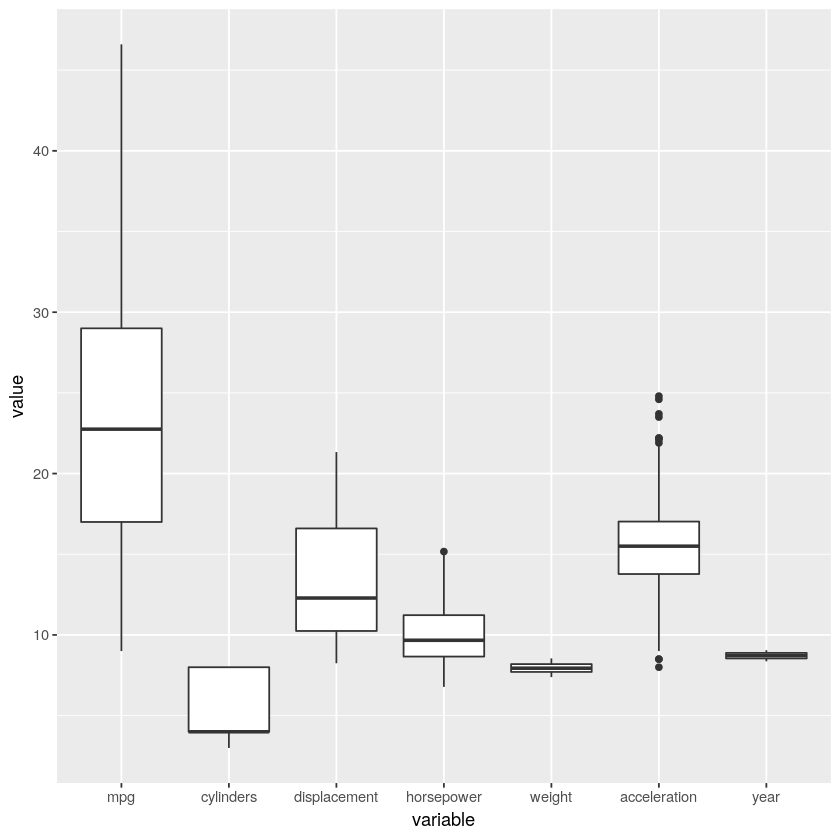

In [14]:
# melt dataframe
melt.df3 <- melt(df[,1:length(df)-1])

# boxplot on the new data with log(weight)
p <- ggplot(melt.df3, aes(variable, value)) 
p + geom_boxplot() 

For convenience we remove all the outliers from `horsepower` and `acceleration`

In [15]:
box.acc <- boxplot(acceleration, plot=FALSE)
box.horse <- boxplot(horsepower, plot=FALSE)

In [16]:
df.clean <- subset(df, !(df$acceleration %in% box.acc$out)
                    & !(df$horsepower %in% box.horse$out))

In [17]:
# ignoring name column
df.clean <- df[,1:length(df.clean)-1]

In [18]:
str(df.clean)

'data.frame':	392 obs. of  8 variables:
 $ mpg         : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cylinders   : int  8 8 8 8 8 8 8 8 8 8 ...
 $ displacement: num  17.5 18.7 17.8 17.4 17.4 ...
 $ horsepower  : num  11.4 12.8 12.2 12.2 11.8 ...
 $ weight      : num  8.16 8.21 8.14 8.14 8.15 ...
 $ acceleration: num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year        : num  8.37 8.37 8.37 8.37 8.37 ...
 $ origin      : Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...


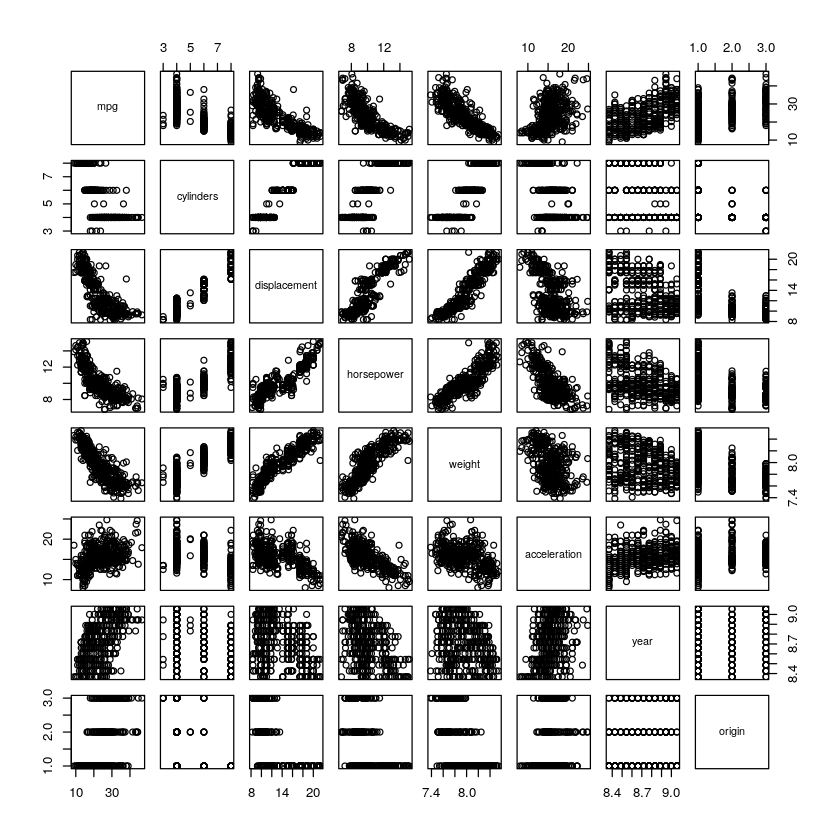

In [19]:
pairs(df.clean)

In [20]:
cor.df.clean <- round(cor(df.clean[,1:length(df.clean)-1]), 2)
cor.df.clean[upper.tri(cor.df.clean, diag = TRUE)] <- 0

cor.df.clean

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,0.00,0.00,0.00,0.00,0.00,0.00,0
cylinders,-0.78,0.00,0.00,0.00,0.00,0.00,0
displacement,-0.82,0.95,0.00,0.00,0.00,0.00,0
horsepower,-0.80,0.85,0.89,0.00,0.00,0.00,0
weight,-0.84,0.88,0.94,0.86,0.00,0.00,0
acceleration,0.42,-0.50,-0.52,-0.70,-0.40,0.00,0
year,0.58,-0.34,-0.35,-0.41,-0.29,0.29,0


In [21]:
melt(cor.df.clean) %>% 
    mutate(abs.value=abs(value)) %>% 
    arrange(desc(abs.value)) %>% 
    select(X1,X2,abs.value) %>% 
    head(10)

X1,X2,abs.value
displacement,cylinders,0.95
weight,displacement,0.94
horsepower,displacement,0.89
weight,cylinders,0.88
weight,horsepower,0.86
horsepower,cylinders,0.85
weight,mpg,0.84
displacement,mpg,0.82
horsepower,mpg,0.80
cylinders,mpg,0.78


From the above table we can see that `displacement` is highly correlated with multiple variables like `cylinders`, `weight`, `horsepower`  
Collinearity could increase the Standard error, so we can remove `displacement`

In [22]:
df.clean <- within(df.clean, rm(displacement))

In [23]:
cor.df.clean <- round(cor(df.clean[,1:length(df.clean)-1]), 2)
cor.df.clean[upper.tri(cor.df.clean, diag = TRUE)] <- 0

melt(cor.df.clean) %>% 
    mutate(abs.value=abs(value)) %>% 
    arrange(desc(abs.value)) %>% 
    select(X1,X2,abs.value) %>% 
    head(10)

X1,X2,abs.value
weight,cylinders,0.88
weight,horsepower,0.86
horsepower,cylinders,0.85
weight,mpg,0.84
horsepower,mpg,0.80
cylinders,mpg,0.78
acceleration,horsepower,0.70
year,mpg,0.58
acceleration,cylinders,0.50
acceleration,mpg,0.42


## Linear Regression

In [24]:
lm.fit <- lm(mpg~., data=df.clean)

In [25]:
summary(lm.fit)


Call:
lm(formula = mpg ~ ., data = df.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.0860 -1.9793  0.0652  1.6797 13.1370 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   54.590726  11.930989   4.576 6.42e-06 ***
cylinders      0.338772   0.220917   1.533  0.12598    
horsepower    -0.409070   0.289750  -1.412  0.15882    
weight       -18.379056   1.729125 -10.629  < 2e-16 ***
acceleration  -0.008199   0.097546  -0.084  0.93305    
year          13.416005   0.852309  15.741  < 2e-16 ***
origin2        1.660290   0.502574   3.304  0.00104 ** 
origin3        1.647053   0.507022   3.248  0.00126 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.115 on 384 degrees of freedom
Multiple R-squared:  0.8435,	Adjusted R-squared:  0.8407 
F-statistic: 295.7 on 7 and 384 DF,  p-value: < 2.2e-16


**Model summary**
* F-statistic has p-value close to 0, which suggests that *atleast one variable has a non zero coefficient*.  
* The Residual Standard Error(RSE) is 3.115
* Adjusted R-squared value is 0.8407, which suggests that 84% of the variability in mpg can be explained by the model
* Individual t-test suggests that `cylinders`, `horsepower` and `acceleration` have less significance in the model

In [26]:
RSE <- 3.115
mpg.mean <- mean(mpg)

cat("Error rate of the model is ", round(RSE/mpg.mean, 2)*100, "%")

Error rate of the model is  13 %

Previous correlation matrix suggested that `cylinders` have high correlation with `weight`, so we can try adding interaction terms to check for synergy effects in the model

In [27]:
lm.fit2 <- lm(mpg~. + cylinders:weight, data = df.clean)

In [28]:
summary(lm.fit2)


Call:
lm(formula = mpg ~ . + cylinders:weight, data = df.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.373  -1.700  -0.145   1.563  12.797 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      164.10891   23.32622   7.035 9.21e-12 ***
cylinders        -23.21788    4.36840  -5.315 1.82e-07 ***
horsepower        -0.73934    0.28629  -2.582  0.01018 *  
weight           -31.66529    2.97350 -10.649  < 2e-16 ***
acceleration      -0.03867    0.09432  -0.410  0.68205    
year              13.61751    0.82354  16.535  < 2e-16 ***
origin2            1.34545    0.48860   2.754  0.00617 ** 
origin3            1.14950    0.49800   2.308  0.02152 *  
cylinders:weight   2.89541    0.53629   5.399 1.18e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.007 on 383 degrees of freedom
Multiple R-squared:  0.8546,	Adjusted R-squared:  0.8516 
F-statistic: 281.4 on 8 and 383 DF,  p-value: < 2.2e-

We can see the Adjusted R-squared has improved from 0.8407 to 0.8516

Even with improved R-squared value, we can use ANOVA to determine if the variance in the new model is statistically significant.

In [29]:
anova(lm.fit, lm.fit2)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
384,3726.857,NA,NA,NA,NA
383,3463.281,1,263.5764,29.14859,1.178416e-07


With p-value closer to 0, we can conclude that our model has significantly improved by adding the interaction term.

In [30]:
round(cor(df.clean[,1:length(df.clean)-1]), 2)[,"cylinders"]

mpg    cylinders   horsepower       weight acceleration         year 
       -0.78         1.00         0.85         0.88        -0.50        -0.34

`acceleration` seems to have high correlation with `weight`, so we can try adding them as interaction terms to the previous model

In [31]:
lm.fit3 <- lm(mpg~. + cylinders:weight + acceleration:weight, data = df.clean)

In [32]:
summary(lm.fit3)


Call:
lm(formula = mpg ~ . + cylinders:weight + acceleration:weight, 
    data = df.clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.2266 -1.7337 -0.0643  1.6143 12.4303 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.0804    51.1654   0.060 0.952024    
cylinders           -15.9226     4.7770  -3.333 0.000942 ***
horsepower           -0.9678     0.2895  -3.343 0.000910 ***
weight              -11.3061     6.4797  -1.745 0.081816 .  
acceleration          6.9903     1.9975   3.500 0.000521 ***
year                 13.9482     0.8169  17.074  < 2e-16 ***
origin2               1.3921     0.4817   2.890 0.004070 ** 
origin3               1.1657     0.4908   2.375 0.018029 *  
cylinders:weight      1.9706     0.5901   3.340 0.000922 ***
weight:acceleration  -0.8923     0.2533  -3.523 0.000479 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.963 on 382 degrees of freedom
Mul

In [33]:
RSE <- 2.963
mpg.mean <- mean(mpg)

cat("Error rate of the model is ", round(RSE/mpg.mean, 2)*100, "%")

Error rate of the model is  13 %

We can notice that the Adjusted R-squared value improved from 0.8516 to 0.8559

In [34]:
anova(lm.fit2, lm.fit3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
383,3463.281,NA,NA,NA,NA
382,3354.313,1,108.9678,12.40961,0.0004788262


Testing the previous two models for ANOVA resulted p-value : 0.0004788262 (which is <0.005)  
So we can conclude that the new model is signifcantly different from previous model and can explain 85.59% of variability in `mpg`

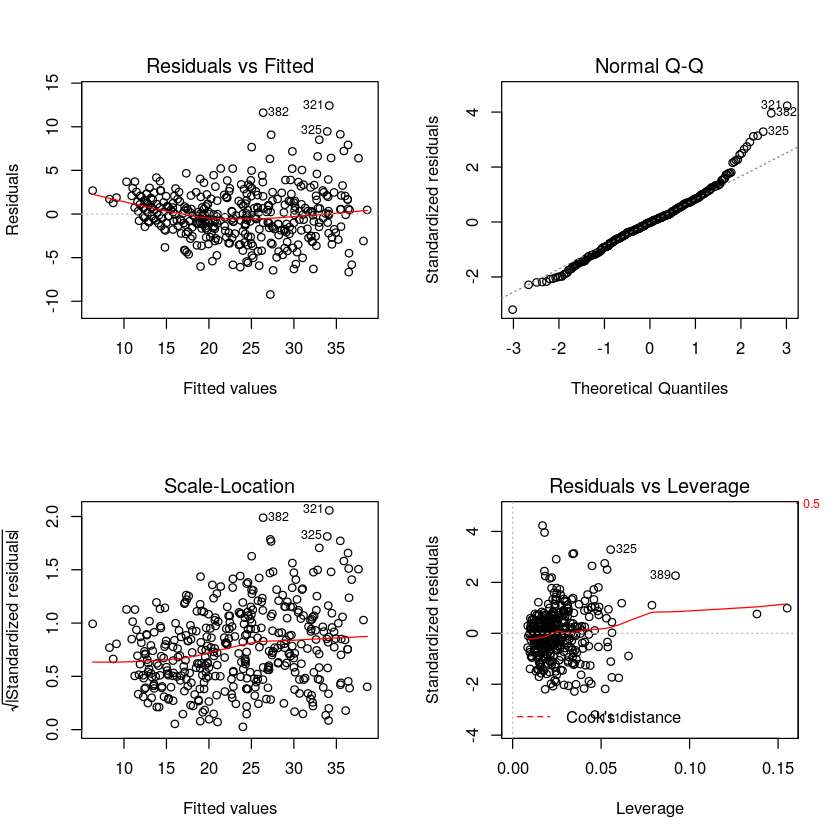

In [35]:
par(mfrow=c(2,2))
plot(lm.fit3)

We can try testing out different models for better prediction

## Summary
From the last model we can notice the following:
* With every new `year`, the automobile gets more fuel efficient (for about 13.9482 mpg)
* `cylinders` and `weight` negatively impacts fuel efficiency